In [9]:
import pandas as pd # pandas как обычно для работы с табличками
import matplotlib.pyplot as plt # библиотека для рисовки графиков
import seaborn as sns # еще одна библиотека для рисовки графиков

# всякие параметры, чтобы графики были красивые
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'

Загрузим данные, в которых содержатся показатели роста и веса 25 000 людей.

In [10]:
df = pd.read_csv('../data/height_weight.csv', sep='\t')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Вес и рост измерены в дюймах и фунтах, переведем их в знакомые нам сантиметры и килограммы.

In [11]:
df['height'] = df['Height(Inches) '] * 2.54
df['weight'] = df['Weight(Pounds)'] * 0.453592
df.head()

,Index,Height(Inches),Weight(Pounds),height,weight
0,1,65.78331,112.9925,167.089607,51.252494
1,2,71.51521,136.4873,181.648633,61.909547
2,3,69.39874,153.0269,176.272800,69.411778
3,4,68.21660,142.3354,173.270164,64.562199
4,5,67.78781,144.2971,172.181037,65.452010


Возьмем только новые колонки.

In [12]:
df = df[['height', 'weight']].dropna()

Построим график из точек.

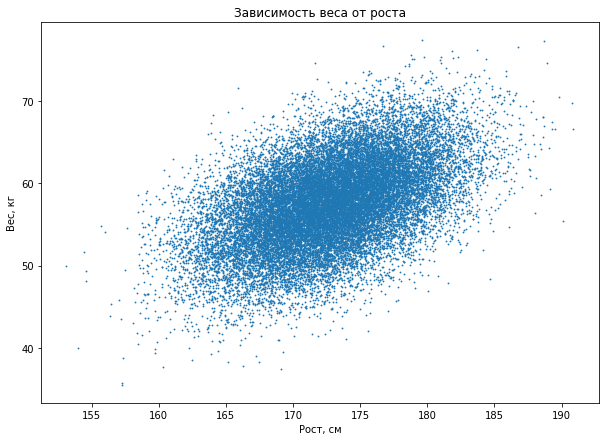

In [13]:
plt.figure(figsize=(10, 7)) # задаем размер графика, (ширина, высота)
plt.scatter(df['height'], df['weight'], s=0.7) # сам график, s - площадь каждой точки
plt.title('Зависимость веса от роста') # заголовок графика
plt.xlabel('Рост, см') # подпись оси OX
plt.ylabel('Вес, кг'); # подпись оси OY

Видно, что две переменные вместе представляют из себя вытянутое вверх и вправо облачко.

Построим гистограмму для роста.

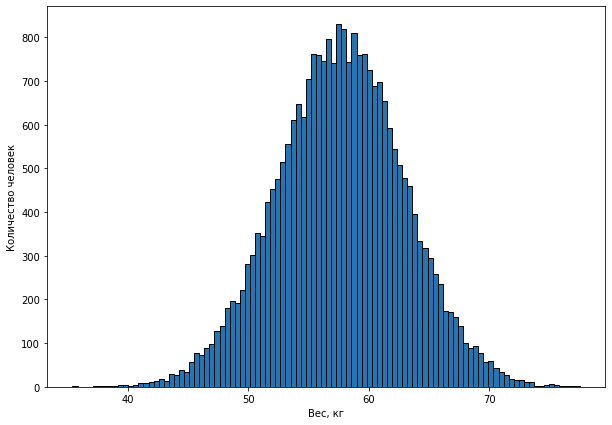

In [14]:
plt.figure(figsize=(10, 7))
plt.hist(df['weight'], bins=100) # передаем числовую колонку, по которой будем строить, и число промежутков
plt.xlabel('Вес, кг')
plt.ylabel('Количество человек');

Гистограмма очень похожа на колокол нормального распределения, это может быть важной информацией, если мы где-то используем наши числа или проверяем какие-либо гипотезы.

Например, это знание очень полезно, чтобы сравнить две группы людей по росту, у одной из которых есть заболевание, влияющее на скелет и кости. Предполагается, что из-за заболевания, рост людей снижается. Чтобы это проверить можно просто сравнить средний рост в обоих группах, если рост на гистограмме представлен в виде колокола. 